In [340]:
# Milan Kovacs - 21308128, Caoimhe Cahill - 21331308
# The code runs to execution

"""
Work to be done:
    - Loading of data    # Caoimhe
    - Processing of data # Caoimhe
    - Define optimiser   # Milan 1 done
    - Define loss function # Caoimhe
    - Define activation function (sigmoid vs others) # Milan done
    - Add comments explaining code
    - Playing with Hyperparameters and noting the results
        - Matplotlib 
            - Training graph
            - Accuracy
    - Evaluation 
"""

'\nWork to be done:\n    - Loading of data    # Caoimhe\n    - Processing of data # Caoimhe\n    - Define optimiser   # Milan 1 done\n    - Define loss function # Caoimhe\n    - Define activation function (sigmoid vs others) # Milan done\n    - Add comments explaining code\n    - Playing with Hyperparameters and noting the results\n        - Matplotlib \n            - Training graph\n            - Accuracy\n    - Evaluation \n'

In [2]:
# Imports
from typing import Callable, List
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import random


      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

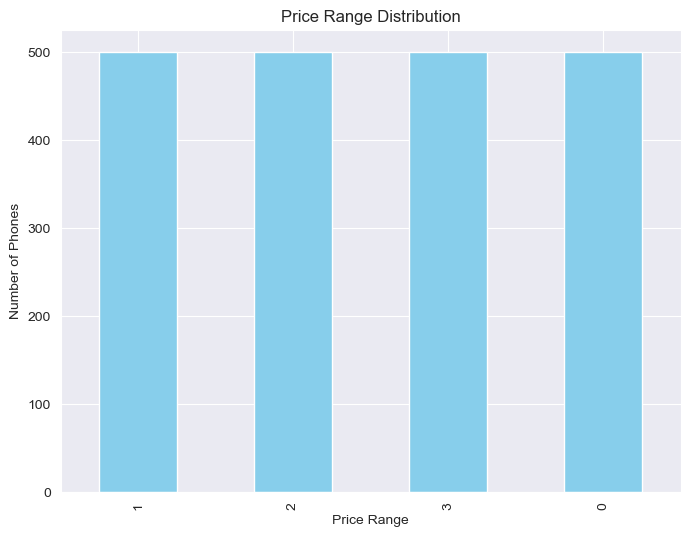

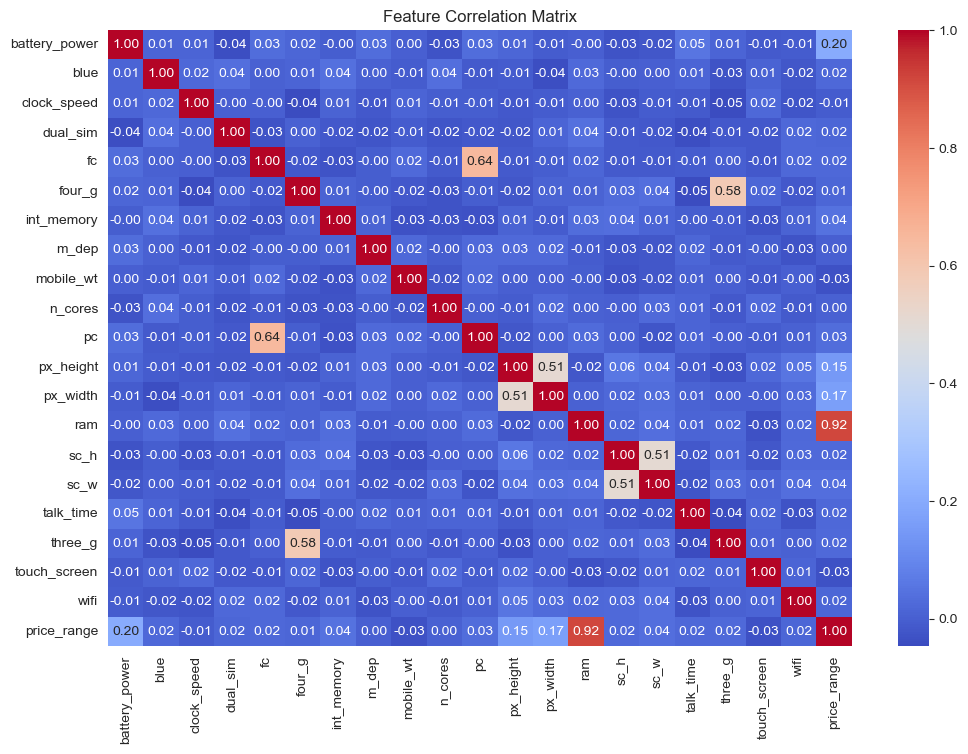

x_train shape: (1600, 6)
x_test shape: (400, 6)
y_train shape: (1600,)
y_test shape: (400,)


In [3]:
# Loading data from csv and printing it
dataset_path = 'phones.csv'
data = pd.read_csv(dataset_path)
print(data)

#Bar Chart graph shows there's no imbalance with the predication value in the dataset - no bias
# Count occurrences of each price range
price_range_counts = data['price_range'].value_counts()
plt.figure(figsize=(8, 6))
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Phones')
plt.show()

# Analyze feature correlations
"""
There is of features so we will use this correlation to decide what features to use 
- selecting features that correlate well with your target variable
- reduce noise
"""
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

#Seperate features and target(prediction variable)
X = data[['battery_power', 'ram', 'int_memory', 'px_width', 'px_height', 'sc_w']]#Features
Y = data['price_range'] #Target(prediction variable)

#Split data in training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a MinMaxScaler for normalisation
scaler = MinMaxScaler()

# Fit Scaler on sets
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Print shapes and the first few rows of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


In [5]:
# Optimisers
"""
    * Rewritten from - http://neuralnetworksanddeeplearning.com/chap1.html 
    * by Michael Nielsen 2019
    
    * It takes in an instance of our MLP
    * The function extracts the properties from our MLP such as
    * test_data, epochs, mini_batch_sizes, training_data
"""
def stochastic_gradient_descent(_mlp: 'MultiLayerPerceptron'):
    _test_data: list | None = _mlp.test_data
    epochs: int = _mlp.epoch
    _mini_batch_size: int = _mlp.mini_batch_size
    _training_data: list = _mlp.training_data
    
    for epoch in range(epochs):
        random.shuffle(_training_data)
        
        mini_batches = populate_mini_batch(_training_data, _mini_batch_size)
        # print(mini_batches[0])
        for mini_batch in mini_batches:
            _mlp.update_mini_batch(mini_batch)
        
        _mlp.run_test(epoch)
        
def Adam(mlp: 'MultiLayerPerceptron'):
    pass

def cross_entropy(mlp: 'MultiLayerPerceptron'):
    pass

# Helper
"""
    * The function takes in training_data which is a list of the training data, and the batch sizes is the size of chunks 
    * we want to split our data set into. The `for iteration in range(0, n_training_data, batch_size)` iterates from 0 to 
    * the number of elements in the training data. Each iteration increments by the batch size number. Then on each 
    * iteration we get a range of elements from the current iteration -> iteration + batch size. This creates evenly
    * distributed chunks.
"""
def populate_mini_batch(_training_data, batch_size) -> list:
    n_training_data = len(_training_data)

    return [
            _training_data[iteration:iteration + batch_size]
            for iteration in range(0, n_training_data, batch_size)
        ]

In [32]:
from typing import Tuple


def vectorized_result(j, num_outputs):
    """Return an N by 1 unit vector, where N is number of possible outputs,
    and j is the expected out. This function will update the index of said 
    """
    e = np.zeros((num_outputs, 1))
    e[j] = 1.0
    return e

# Constructor
class MultiLayerPerceptron:
    def __init__(self, 
                 layers: List[int], 
                 provided_loss_function: Callable[[float, float], float] = print, # todo: decide whether we pass these functions or call a switch case
                 provided_optimiser: Callable[['MultiLayerPerceptron'], float] = print,
                 provided_activation_function: Callable[[float], float] = print,
                 provided_activation_function_prime: Callable[[float], float] = print,
                 training_data: Tuple[any, any] = None,
                 test_data: Tuple[any, any] = None,                  
                 learning_rate: float = 0.2,
                 epoch: int = 1_000,
                 mini_batch_size: int = 100) -> None:
        # Declarations
        number_of_inputs = layers[0]
        number_of_outputs = layers[-1]
        
        self.layers  = layers
        self.num_layers = len(self.layers)
        self.learning_rate = learning_rate
        self.epoch = epoch
        
        training_inputs = [np.reshape(x, (number_of_inputs, 1)) for x in training_data[0]]
        training_results = [vectorized_result(y, number_of_outputs) for y in training_data[1]]
        training_data = list(zip(training_inputs, training_results))
        self.training_data = training_data
        
        test_inputs = [np.reshape(x, (number_of_inputs, 1)) for x in test_data[0]]
        self.test_data  = list(zip(test_inputs, test_data[1]))

        self.loss_function = provided_loss_function
        self.activation_function = provided_activation_function
        self.activation_function_prime = provided_activation_function_prime
        self.mini_batch_size = mini_batch_size
        self.optimiser = provided_optimiser
        
        self.weights = []
        self.biases  = []
        
        print(str(self))
        
        # Setting up
        self.set_weights()
        self.set_biases()
        
        self.optimiser(self)


        # Transform data
    
        # Completion
 
    
    """
        * Generates a list of array shapes for each weight that corresponds to each weight in a given layer.
        * for example: if our layer is [4, 5, 2, 1], then we will have two lists to zip through
        * [4, 5, 2] and [5, 2, 1] which means on first iteration, we have our input layer of [4] nodes connecting to each [5] nodes 
        * in the first hidden layer. This will generate a shape of 5 lists, with 4 weights each.
        * Each shape corresponds to a node within our hidden layer (of 5 nodes) and in each shape the index 
        * corresponds to the index of our input layer. This is applied for the rest of the layers. 
    """
    def set_weights(self) -> None:
        layers_after_input_layer = self.layers[1:]
        layers_before_output_layer = self.layers[:-1]
        self.weights = [
            np.random.randn(y, x)
            for x, y in zip(layers_before_output_layer, layers_after_input_layer)
        ]
    
    """
        * Generates a list of Y by 1 dimensional list, where Y is the given layer size.
        * This means we can correspond each index to a layer of biases,
        * and within it, we can correspond each bias to a given node inside of that layer
    """
    def set_biases(self) -> None:
        layers_after_input = self.layers[1:]
        self.biases = [
            np.random.randn(y, 1) 
            for y in layers_after_input
        ]
    
    def update_mini_batch(self, mini_batch: List[tuple[any, any]]) -> None:
        lr = self.learning_rate
        nabla_biases = [np.zeros(b.shape) for b in self.biases]   # Derivative of biases
        nabla_weights = [np.zeros(w.shape) for w in self.weights] # Derivative of weights
        
        """
            * We will iterate through the inputs and expected outputs of our mini batch provided
            * 
        """
        for _input, expected_output in mini_batch:
            delta_nabla_biases, delta_nabla_weights = self.backprop(_input, expected_output)
            nabla_biases = [nabla_bias + delta_nabla_bias for nabla_bias, delta_nabla_bias in zip(nabla_biases, delta_nabla_biases)]
            nabla_weights = [nabla_weight + delta_nabla_weight for nabla_weight, delta_nabla_weight in zip(nabla_weights, delta_nabla_weights)]
            
        """
           * [weight - (lr / len(mini_batch)) * nabla_weight
                        for weight, nabla_weight in zip(self.weights, nabla_weights)]
           * This is the delta rule applied to all the weights and biases. 
           *                new_weight = weight - derivative_weight * learning_rate
           *
           * We have our weights and the delta_weights (nabla_weights) and we iterate through the two in parallel
           * We divide the learning_rate by the number of items in our mini_batch to keep it proportional
           * 
           * This same concept is applied to the biases
        """
        self.weights = [weight - (lr / len(mini_batch)) * nabla_weight
                        for weight, nabla_weight in zip(self.weights, nabla_weights)]
        self.biases = [bias - (lr / len(mini_batch)) * nabla_bias
                       for bias, nabla_bias in zip(self.biases, nabla_biases)]
    
    """
        * 
    """
    def backprop(self, _in, _expected) -> (List, List):
        nabla_biases =  [np.zeros(b.shape) for b in self.biases]    # Derivative of biases
        nabla_weights = [np.zeros(w.shape) for w in self.weights]   # Derivative of weights
        
        activation  = _in    # The inputted activation
        activations = [_in]  # We will store all the activations, so we know which nodes are triggered
        outputs     = []   
        
        for bias, weight in zip(self.biases, self.weights):
            output = np.dot(weight, activation) + bias # What is calculated by the node
            outputs.append(output)         # Store all the outputs for the layer
            activation = self.activation_function(output)   # Activation for current node
            activations.append(activation) # Activations for the layer provided
            
        # Backward pass
        # delta = self.loss_function(activations[-1], _expected) * self.activation_function_prime(outputs[-1])
        delta = activations[-1] - _expected
        nabla_biases[-1] = delta
        nabla_weights[-1] = np.dot(delta, activations[-2].transpose())
        
        for layer in range(2, self.num_layers):
            output = outputs[-layer]
            _optimiser_prime = self.activation_function_prime(output)
            delta = np.dot(self.weights[-layer+1].transpose(), delta) * _optimiser_prime
            nabla_biases[-layer] = delta
            nabla_weights[-layer] = np.dot(delta, activations[-layer-1].transpose())
        
        return nabla_biases, nabla_weights
    
    def evaluate(self, data):
        test_results = [
            (np.argmax(self.feedforward(_in)), expected)
            for (_in, expected) in data
        ]
        return sum(int(_in == expected) for (_in, expected) in test_results)

    def evaluate_training(self):
        test_results = [
            (np.argmax(self.feedforward(_in)), expected)
            for (_in, expected) in self.training_data
        ]

        return sum(int(expected_layers[_in] == 1) for (_in, expected_layers) in test_results)

    def feedforward(self, _in):
        for bias, weight in zip(self.biases, self.weights):
            _in = self.activation_function(np.dot(weight, _in) + bias)
            
        # Use softmax for the final layer 
        _in = softmax(_in)  #
        return _in

    def run_test(self, epoch_iter):
        
        if self.test_data is not None:
            n_test = len(self.test_data)
            correctly_predicted_training_data = self.evaluate(self.test_data)
            print(f"Epoch {epoch_iter}: Test data - {correctly_predicted_training_data} / {n_test} = {correctly_predicted_training_data / n_test * 100}% accuracy")
        else:
            print(f"Epoch {epoch_iter} complete")
        
        n_training = len(self.training_data)
        testing_on_training_data = self.evaluate_training()
        print(f"Epoch {epoch_iter}: Training data - {testing_on_training_data} / {n_training} = {testing_on_training_data / n_training * 100}% accuracy")
    
    def __str__(self) -> str:
        string = "Created network with: " + str(self.layers) +       "\n" + \
        "num_layers = "+     str(self.num_layers) +                                         "\n" + \
        "learning_rate = "+    str(self.learning_rate) +                                    "\n" + \
        "loss_function = "+    str(self.loss_function.__name__) +                           "\n" + \
        "activation_function = "+ str(self.activation_function.__name__) +                  "\n" + \
        "mini_batch_size = "+ str(self.mini_batch_size) +                                   "\n" + \
        "optimiser = "+ str(self.optimiser.__name__)
        return string


In [33]:
# Activation functions

# http://neuralnetworksanddeeplearning.com/chap1.html 
# ~ Michael Nielsen 2019
threshold = 0

def sigmoid(y: float):
    return 1.0 / (1.0 + np.exp(-y))

def sigmoid_prime(y: float):
    return sigmoid(y) * (1 - sigmoid(y))
    
def stepper(y: float):
    return 1 if y >= threshold else 0

def stepper_prime(y: float):
    return 0

def softmax(x):
    exp_x = np.exp(x - np.max(x))  
    return exp_x / np.sum(exp_x, axis=0)

# Tanh and Tanh Derivative 
# Vikram Pande
# https://medium.com/@vikrampande783/derivative-of-sigmoid-and-tanh-ffdea6efb464

def tanh(y: float):
    return np.tanh(y)

def tanh_prime(y: float):
    return 1 - tanh(y) ** 2

# ReLU, ReLU Derivative, Leaky ReLU and Leaky Derivative 
# Jayant Verma
# https://www.digitalocean.com/community/tutorials/relu-function-in-python

def rectified_linear_unit(y: float):
    return max(0.0, y)

def rectified_linear_unit_prime(y: float):
    return 1 if y > 0 else 0

def leaky_relu(y: float):
    return 0.01 * y if y < 0 else y

def leaky_relu_prime(y: float):
    return 1 if y >= 0 else 0.01

# Scaled Exponential Linear Unit
# neuralthreads
# https://neuralthreads.medium.com/selu-and-elu-exponential-linear-units-a826d5eeb99c
def selu(y: float, scale = 1, alpha = 1):
    return scale * y if y > 0 else scale * alpha * (np.exp(np.e, y) - 1)

def selu_prime(y: float, scale = 1, alpha = 1):
    return scale if y > 0 else scale * alpha * np.exp(np.e, y) 



In [34]:
# Loss Functions
def mean(output_activations: float, actual: float) -> float:
    """Return the vector of partial derivatives partial C_x partial a for the output activations."""
    return output_activations-actual

def mean_squared_error(output_activations, actual):
    return np.square(output_activations - actual)

def cross_entropy_loss(output, expected_output):
    output = np.clip(output, 1e-12, 1. - 1e-12)
    return -np.sum(expected_output * np.log(output)) / output.shape[0]


In [35]:
learning_rate = 2.0
epoch = 100  
mini_batch_size = 10

mlp = MultiLayerPerceptron(
    layers = [6, 18, 4], 
    provided_loss_function = cross_entropy_loss,
    provided_optimiser = stochastic_gradient_descent,
    provided_activation_function = sigmoid, 
    provided_activation_function_prime = sigmoid_prime,
    training_data = (x_train, y_train), 
    test_data = (x_test, y_test),
    learning_rate = learning_rate,
    epoch = epoch
)



Created network with: [6, 18, 4]
num_layers = 3
learning_rate = 2.0
loss_function = cross_entropy_loss
activation_function = sigmoid
mini_batch_size = 100
optimiser = stochastic_gradient_descent
Epoch 0: Test data - 198 / 400 = 49.5% accuracy
Epoch 0: Training data - 807 / 1600 = 50.4375% accuracy


C:\Users\caoim\AppData\Local\Temp\ipykernel_16460\684515867.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return sum(int(expected_layers[_in] == 1) for (_in, expected_layers) in test_results)


Epoch 1: Test data - 235 / 400 = 58.75% accuracy
Epoch 1: Training data - 939 / 1600 = 58.6875% accuracy
Epoch 2: Test data - 300 / 400 = 75.0% accuracy
Epoch 2: Training data - 1138 / 1600 = 71.125% accuracy
Epoch 3: Test data - 253 / 400 = 63.24999999999999% accuracy
Epoch 3: Training data - 1006 / 1600 = 62.875% accuracy
Epoch 4: Test data - 304 / 400 = 76.0% accuracy
Epoch 4: Training data - 1167 / 1600 = 72.9375% accuracy
Epoch 5: Test data - 338 / 400 = 84.5% accuracy
Epoch 5: Training data - 1295 / 1600 = 80.9375% accuracy
Epoch 6: Test data - 275 / 400 = 68.75% accuracy
Epoch 6: Training data - 1036 / 1600 = 64.75% accuracy
Epoch 7: Test data - 346 / 400 = 86.5% accuracy
Epoch 7: Training data - 1399 / 1600 = 87.4375% accuracy
Epoch 8: Test data - 320 / 400 = 80.0% accuracy
Epoch 8: Training data - 1251 / 1600 = 78.1875% accuracy
Epoch 9: Test data - 308 / 400 = 77.0% accuracy
Epoch 9: Training data - 1204 / 1600 = 75.25% accuracy
Epoch 10: Test data - 347 / 400 = 86.75% accura

In [350]:
learning_rate = 2.0
epoch = 100  
mini_batch_size = 10

import mnist_loader
training_data, validation_data, test_data1 = mnist_loader.load_data()

mlp = MultiLayerPerceptron(
    layers = [784, 30, 10], 
    provided_loss_function = mean,
    provided_optimiser = stochastic_gradient_descent,
    provided_activation_function = sigmoid, 
    provided_activation_function_prime = sigmoid_prime,
    training_data = training_data, 
    test_data = test_data1,
    learning_rate = learning_rate,
    epoch = epoch
)


Created network with: [784, 30, 10]
num_layers = 3
learning_rate = 2.0
loss_function = mean
activation_function = sigmoid
mini_batch_size = 100
optimiser = stochastic_gradient_descent
Epoch 0: Test data - 5179 / 10000 = 51.790000000000006% accuracy


C:\Users\kmila\AppData\Local\Temp\ipykernel_2992\1578453197.py:172: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return sum(int(expected_layers[_in] == 1) for (_in, expected_layers) in test_results)


Epoch 0: Training data - 25247 / 50000 = 50.49400000000001% accuracy
Epoch 1: Test data - 6054 / 10000 = 60.540000000000006% accuracy
Epoch 1: Training data - 30070 / 50000 = 60.14000000000001% accuracy
Epoch 2: Test data - 6767 / 10000 = 67.67% accuracy
Epoch 2: Training data - 33424 / 50000 = 66.848% accuracy
Epoch 3: Test data - 6965 / 10000 = 69.65% accuracy
Epoch 3: Training data - 34482 / 50000 = 68.964% accuracy
Epoch 4: Test data - 7068 / 10000 = 70.67999999999999% accuracy
Epoch 4: Training data - 35105 / 50000 = 70.21% accuracy
Epoch 5: Test data - 7389 / 10000 = 73.89% accuracy
Epoch 5: Training data - 36692 / 50000 = 73.384% accuracy
Epoch 6: Test data - 8032 / 10000 = 80.32000000000001% accuracy
Epoch 6: Training data - 40025 / 50000 = 80.05% accuracy


KeyboardInterrupt: 